# Full attack detection by Random Forest (CICID-IDS2017 dataset)

## Объединяем все файлы с классами аттак

In [3]:
import pandas as pd
import numpy as np

# отображение наборов данных
pd.set_option('display.max_columns', None)

#Пропускаю файл понедельника, так как там только нормальный трафик

""" 
    файл вторника: 
        Brute Force,
        FTP-Patator (9:20 – 10:20 a.m.),
        SSH-Patator (14:00 – 15:00 p.m.)
"""

brute_force_attack_data = pd.read_csv(
    'GeneratedLabelledFlows/Tuesday-WorkingHours.pcap_ISCX.csv',
    encoding = 'cp1252',
    low_memory = True
)

""" 
    файл среды: 
        DoS / DDoS
        DoS slowloris (9:47 – 10:10 a.m.)
        DoS Slowhttptest (10:14 – 10:35 a.m.)
        DoS Hulk (10:43 – 11 a.m.)
        DoS GoldenEye (11:10 – 11:23 a.m.)

        ?
        Heartbleed Port 444 (15:12 - 15:32)
"""

ddos_attack_data = pd.read_csv(
    'GeneratedLabelledFlows/Wednesday-workingHours.pcap_ISCX.csv',
    encoding = 'cp1252',
    low_memory = True
)

""" 
    файлы четверга: 
        Web Attack – Brute Force (9:20 – 10 a.m.)
        Web Attack – XSS (10:15 – 10:35 a.m.)
        Web Attack – Sql Injection (10:40 – 10:42 a.m.)

        
        Infiltration – Dropbox download
        Meta exploit Win Vista (14:19 and 14:20-14:21 p.m.) and (14:33 -14:35)
        Infiltration – Cool disk – MAC (14:53 p.m. – 15:00 p.m.)
        Infiltration – Dropbox download
        Win Vista (15:04 – 15:45 p.m.)
"""

web_attack_data = pd.read_csv(
    'GeneratedLabelledFlows/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    encoding = 'cp1252',
    low_memory= False
)

infiltration_attack = pd.read_csv(
    'GeneratedLabelledFlows/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    encoding = 'cp1252',
    low_memory= False
)


""" 
    файлы пятницы: 
        Botnet ARES (10:02 a.m. – 11:02 a.m.)
        Port Scan:
            1)Firewall Rule on (13:55 – 13:57, 13:58 – 14:00,
                            14:01 – 14:04, 14:05 – 14:07,
                            14:08 - 14:10, 14:11 – 14:13,
                            14:14 – 14:16, 14:17 – 14:19,
                            14:20 – 14:21, 14:22 – 14:24,
                            14:33 – 14:33, 14:35 - 14:35)
            
            2)Firewall rules off (sS 14:51-14:53, sT 14:54-14:56,
                            sF 14:57-14:59, sX 15:00-15:02,
                            sN 15:03-15:05, sP 15:06-15:07,
                            sV 15:08-15:10, sU 15:11-15:12,
                            sO 15:13-15:15, sA 15:16-15:18,
                            sW 15:19-15:21, sR 15:22-15:24,
                            sL 15:25-15:25, sI 15:26-15:27,
                            b 15:28-15:29)
                            
        DDoS LOIT (15:56 — 16:16)

"""
    
botnet_attack_data = pd.read_csv(
    'GeneratedLabelledFlows/Friday-WorkingHours-Morning.pcap_ISCX.csv',
    encoding = 'cp1252',
    low_memory= False
)

port_scan_attack_data = pd.read_csv(
    'GeneratedLabelledFlows/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
    encoding = 'cp1252',
    low_memory= False
)

ddos_attack_friday_data = pd.read_csv(
    'GeneratedLabelledFlows/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    encoding = 'cp1252',
    low_memory= False
)

#объединяем датасеты
worker_df = pd.concat(
    [
        brute_force_attack_data, ddos_attack_data,
        web_attack_data, infiltration_attack,
        botnet_attack_data, port_scan_attack_data,
        ddos_attack_friday_data
    ],
    axis = 0,
    ignore_index = True,
) 


In [4]:
display(worker_df.info())
display(worker_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589427 entries, 0 to 2589426
Data columns (total 85 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Flow ID                       object 
 1    Source IP                    object 
 2    Source Port                  float64
 3    Destination IP               object 
 4    Destination Port             float64
 5    Protocol                     float64
 6    Timestamp                    object 
 7    Flow Duration                float64
 8    Total Fwd Packets            float64
 9    Total Backward Packets       float64
 10  Total Length of Fwd Packets   float64
 11   Total Length of Bwd Packets  float64
 12   Fwd Packet Length Max        float64
 13   Fwd Packet Length Min        float64
 14   Fwd Packet Length Mean       float64
 15   Fwd Packet Length Std        float64
 16  Bwd Packet Length Max         float64
 17   Bwd Packet Length Min        float64
 18   Bwd Packet Length Mea

None

(2589427, 85)

In [5]:
display(worker_df.columns)

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

## Препроцессинг часть 1 - уменьшаем размерность датасета

In [7]:
#Удаление лишних пробелов
# и замена пробелов на "_"
worker_df.columns = worker_df.columns.str.strip() \
                            .str.replace(" ", "_") \
                            .str.replace("/", "_")

display(worker_df.columns)

Index(['Flow_ID', 'Source_IP', 'Source_Port', 'Destination_IP',
       'Destination_Port', 'Protocol', 'Timestamp', 'Flow_Duration',
       'Total_Fwd_Packets', 'Total_Backward_Packets',
       'Total_Length_of_Fwd_Packets', 'Total_Length_of_Bwd_Packets',
       'Fwd_Packet_Length_Max', 'Fwd_Packet_Length_Min',
       'Fwd_Packet_Length_Mean', 'Fwd_Packet_Length_Std',
       'Bwd_Packet_Length_Max', 'Bwd_Packet_Length_Min',
       'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Std', 'Flow_Bytes_s',
       'Flow_Packets_s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max',
       'Flow_IAT_Min', 'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std',
       'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean',
       'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags',
       'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets_s', 'Bwd_Packets_s',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
  

In [8]:
display(worker_df[['Fwd_Header_Length', 'Fwd_Header_Length.1']])

#Так как Fwd Header Length и Fwd Header Length.1 идентичны, удаляем один из них
worker_df.drop(columns=['Fwd_Header_Length.1'], inplace=True, errors='ignore')

#Отображаем количество столбцов после удаления 1 столбца(должно остаться 84)
display(len(worker_df.columns))

,Fwd_Header_Length,Fwd_Header_Length.1
0,164.0,164.0
1,204.0,204.0
2,164.0,164.0
3,164.0,164.0
4,204.0,204.0
...,...,...
2589422,20.0,20.0
2589423,20.0,20.0
2589424,20.0,20.0
2589425,40.0,40.0


84

In [9]:
#проверяем датсет на inf и nan значения

has_inf = np.isinf(worker_df.select_dtypes(include='number').values).any()
if has_inf:
    print("В датасете есть бесконечные значения, удаляем их")
    worker_df.replace([np.inf, -np.inf], np.nan, inplace=True)
else:
    print("Датасет не имеет бесконечных значений")

has_nan = np.isnan(worker_df.select_dtypes(include='number').values).any()
if has_nan:
    print("Датасет имеет NAN значения, удаляем")
    worker_df.dropna(inplace=True)

# До преобразования было (2589427, 84)
display(worker_df.shape)

В датасете есть бесконечные значения, удаляем их
Датасет имеет NAN значения, удаляем


(2298395, 84)

## Препроцессинг часть 2 - занижаем дисерктизацию датасета и уменьшаем дисбаланс данных

### Шаг 1 - занижение дискретизации

In [12]:
"""
7 объектов - (идентификатор потока[Flow_ID], IP-адрес источника[Source_IP],
порт источника[Source_Port], IP-адрес назначения[Destination_IP],
порт назначения[Destination_Port], протокол[Protocol],
Временная метка[Timestamp])- исключены из набора данных.

Гипотеза состоит в том, что "форма" передаваемых данных важнее, чем эти атрибуты.
Кроме того, порты и адреса могут быть подменены злоумышленником, поэтому лучше,
чтобы алгоритм ML не учитывал эти особенности при обучении
"""

excluded_col = ['Flow_ID', 'Source_IP', 'Source_Port', 'Destination_IP',
            'Destination_Port', 'Protocol', 'Timestamp']
worker_df.drop(columns=excluded_col, inplace=True)

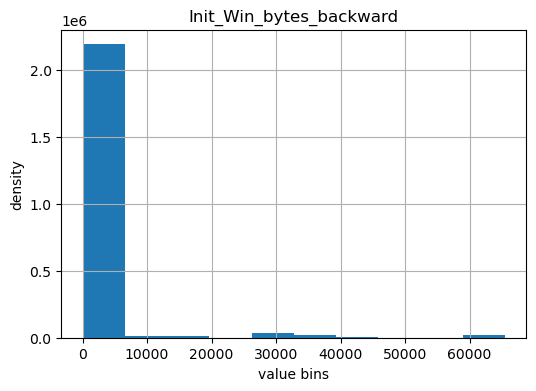

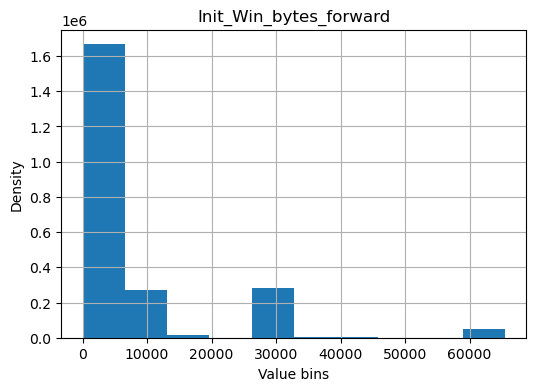

In [13]:
"""
Ниже на этапе оценки важности функция "Init_Win_bytes_backward" - 
имеет максимальное значение. После просмотра исходного набора данных кажется,
что при формировании набора данных была допущена неточность.
Оказывается, можно провести довольно точную классификацию по одному признаку.

Init_Win_bytes_backward - Общее количество байтов,
отправленных в начальном окне в обратном направлении

Init_Win_bytes_forward - Общее количество байтов,
отправленных в начальном окне в прямом направлении

Так же удаляем их из датасета
"""
from matplotlib import pyplot as plt

# Строем график по выбранной метке Init_Win_bytes_backward
if 'Init_Win_bytes_backward' in worker_df.columns:
    worker_df['Init_Win_bytes_backward'].hist(figsize=(6,4), bins=10)
    plt.title('Init_Win_bytes_backward')
    plt.xlabel('value bins')
    plt.ylabel('density')
    #plt.savefig('Init_Win_bytes_backward.png', dpi=300)
    plt.show()

# Строем график по выбранной метке Init_Win_bytes_forward
if 'Init_Win_bytes_forward' in worker_df.columns:
    worker_df['Init_Win_bytes_forward'].hist(figsize=(6,4), bins=10)
    plt.title("Init_Win_bytes_forward")
    plt.xlabel("Value bins")
    plt.ylabel("Density")
    #plt.savefig('Init_Win_bytes_forward.png', dpi=300)
    plt.show()

In [14]:
#Удаляем их из набора данных
excluded_col = ['Init_Win_bytes_backward', 'Init_Win_bytes_forward']
worker_df.drop(columns=excluded_col, inplace=True, errors='ignore')

#мы уже удалили как минимум [7 + 2 == 84 - 9] колонок
display(worker_df.shape)

(2298395, 75)

### Шаг 2 - решаем проблему дисбаланса данных

In [16]:
#Определение количества строк с нормальным трафиком и содержащим атаку
normal_trafic_total = len(worker_df[worker_df["Label"] == "BENIGN"])
attack_trafic_total = len(worker_df[worker_df["Label"] != "BENIGN"])
display("Нормальный трафик: {}".format(normal_trafic_total))
display("Аномальный трафик: {}".format(attack_trafic_total))

#вывод всех возможных значений метки Label
display(worker_df['Label'].value_counts())

'Нормальный трафик: 1741839'

'Аномальный трафик: 556556'

Label
BENIGN                        1741839
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack – Brute Force         1507
Web Attack – XSS                  652
Infiltration                       36
Web Attack – Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

#### Удаляем маленькие классы, так как обучить модель на них не является возможным

In [18]:
#колиичество каждого класса
class_counts = worker_df['Label'].value_counts()
#список классов, которые больше >= 1000
valid_classes = class_counts[class_counts >= 1000].index

#оставляем классы с больше чем 1000 примерами
df_filtered = worker_df[worker_df['Label'].isin(valid_classes)]

#вывод всех возможных значений метки Label
display(df_filtered['Label'].value_counts())

""" 
    Были удалены следующие классы:
        Web Attack – XSS                  652
        Infiltration                       36
        Web Attack – Sql Injection         21
        Heartbleed                         11
"""

Label
BENIGN                      1741839
DoS Hulk                     230124
PortScan                     158804
DDoS                         128025
DoS GoldenEye                 10293
FTP-Patator                    7935
SSH-Patator                    5897
DoS slowloris                  5796
DoS Slowhttptest               5499
Bot                            1956
Web Attack – Brute Force       1507
Name: count, dtype: int64

' \n    Были удалены следующие классы:\n        Web Attack – XSS                  652\n        Infiltration                       36\n        Web Attack – Sql Injection         21\n        Heartbleed                         11\n'

In [19]:
#Перед работой над Label делаем его списком(иначе появляется ошибка)
label_feature = list(df_filtered.select_dtypes(include=['object']).columns)

#из категориального в числовой
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

df_filtered[label_feature] = df_filtered[label_feature].apply(lambda row: label_enc.fit_transform(row))
display(df_filtered['Label'].value_counts())

C:\Users\MeizekiN\AppData\Local\Temp\ipykernel_10216\2608502524.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[label_feature] = df_filtered[label_feature].apply(lambda row: label_enc.fit_transform(row))


Label
0     1741839
4      230124
8      158804
2      128025
3       10293
7        7935
9        5897
6        5796
5        5499
1        1956
10       1507
Name: count, dtype: int64

In [20]:
"""
Тестовые данные должны оставаться чистыми,
поэтому применяю балансировку ТОЛЬКО на тренировочных данных!

Это позволит избежать переобучения и зашумления данных,
 а так же ложно-завышенной точности

"""
from sklearn.model_selection import train_test_split

#считываю файл, готовый к балансировке данных

y = df_filtered['Label'].values
x = df_filtered.drop(columns=['Label'])

#распределяю данные на тренирововчные и тестовые выборки для балансировки
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size = 0.3, random_state=42)

#Балансировка данных
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

print('До балансировки:', sorted(Counter(y_train).items()))


#Функция автоматической стратегии балансировки
def balancing_strategy(y_train, min_samples=1000, max_samples=100000):
    class_counts = dict(Counter(y_train))
    over_strategy = {}
    under_strategy = {}

    for cls, count in class_counts.items():
        if count < min_samples:
            over_strategy[cls] = min_samples
        elif count > max_samples:
            under_strategy[cls] = max_samples
        else:
            pass  # оставляем как есть

    return over_strategy, under_strategy


over_strategy, under_strategy = balancing_strategy(y_train, min_samples=10000, max_samples=100000)

print("Стратегия Oversampling:", over_strategy)
print("Стратегия Undersampling:", under_strategy)

# пайплайн, производящий преобразование над классами
pipeline = Pipeline([
    ('over', BorderlineSMOTE(sampling_strategy=over_strategy, n_jobs=-1)),
    ('under', RandomUnderSampler(sampling_strategy=under_strategy))
])

#применяем пайплайн
x_res, y_res = pipeline.fit_resample(x_train, y_train)

print('\nПосле балансировки:', sorted(Counter(y_res).items()))

До балансировки: [(0, 1219287), (1, 1369), (2, 89617), (3, 7205), (4, 161087), (5, 3849), (6, 4057), (7, 5555), (8, 111163), (9, 4128), (10, 1055)]
Стратегия Oversampling: {7: 10000, 5: 10000, 9: 10000, 3: 10000, 6: 10000, 1: 10000, 10: 10000}
Стратегия Undersampling: {0: 100000, 8: 100000, 4: 100000}


C:\Users\MeizekiN\anaconda3\Lib\site-packages\imblearn\over_sampling\_smote\filter.py:197: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
C:\Users\MeizekiN\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\MeizekiN\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\MeizekiN\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^


После балансировки: [(0, 100000), (1, 10000), (2, 89617), (3, 10000), (4, 100000), (5, 10000), (6, 10000), (7, 10000), (8, 100000), (9, 10000), (10, 10000)]


In [21]:
#Датасеты тренировочной и тестовой выборок
df_train_balanced_data = x_res.copy()
df_train_balanced_data['Label'] = y_res.copy()

display(df_train_balanced_data)

df_test_clean_data = x_test.copy()
df_test_clean_data['Label'] = y_test.copy()

display(df_test_clean_data)

,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes_s,Flow_Packets_s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets_s,Bwd_Packets_s,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down_Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Fwd_Avg_Bytes_Bulk,Fwd_Avg_Packets_Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes_Bulk,Bwd_Avg_Packets_Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
1558316,2.343700e+04,1.0,1.0,57.0,138.0,57.0,57.0,57.000000,0.00000,138.0,138.0,138.00,0.000000,8.320177e+03,85.335154,2.343700e+04,0.000000e+00,2.343700e+04,23437.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,32.0,32.0,42.667577,42.667577,57.0,138.0,84.000000,46.765372,2187.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,126.000000,57.000000,138.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,57.0,1.0,138.0,0.0,32.0,0.0000,0.000,0.0,0.0,0.000,0.00000,0.0,0.0,0
54069,1.760000e+02,2.0,2.0,96.0,180.0,48.0,48.0,48.000000,0.00000,90.0,90.0,90.00,0.000000,1.568182e+06,22727.272730,5.866667e+01,9.555278e+01,1.690000e+02,3.000000,3.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00,3.000000,4.0,4.0,0.000,4.0,4.0,0.0,0.0,0.0,0.0,40.0,40.0,11363.636360,11363.636360,48.0,90.0,64.800000,23.004347,529.2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,81.000000,48.000000,90.00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,96.0,2.0,180.0,1.0,20.0,0.0000,0.000,0.0,0.0,0.000,0.00000,0.0,0.0,0
244629,4.685100e+04,2.0,2.0,66.0,500.0,33.0,33.0,33.000000,0.00000,250.0,250.0,250.00,0.000000,1.208085e+04,85.377046,1.561700e+04,2.700528e+04,4.680000e+04,3.000000,3.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00,3.000000,48.0,48.0,0.000,48.0,48.0,0.0,0.0,0.0,0.0,64.0,40.0,42.688523,42.688523,33.0,250.0,119.800000,118.855795,14126.7000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,149.750000,33.000000,250.00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,66.0,2.0,500.0,1.0,32.0,0.0000,0.000,0.0,0.0,0.000,0.00000,0.0,0.0,0
8187,3.076100e+04,2.0,2.0,78.0,290.0,39.0,39.0,39.000000,0.00000,145.0,145.0,145.00,0.000000,1.196320e+04,130.034784,1.025367e+04,1.775381e+04,3.075400e+04,3.000000,3.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00,3.000000,4.0,4.0,0.000,4.0,4.0,0.0,0.0,0.0,0.0,40.0,40.0,65.017392,65.017392,39.0,145.0,81.400000,58.058591,3370.8000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,101.750000,39.000000,145.00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,78.0,2.0,290.0,1.0,20.0,0.0000,0.000,0.0,0.0,0.000,0.00000,0.0,0.0,0
1334873,7.412685e+07,17.0,16.0,3355.0,4028.0,929.0,0.0,197.352941,355.35826,1448.0,0.0,251.75,457.162043,9.959953e+01,0.445183,2.316464e+06,4.177223e+06,1.000000e+07,2.000000,6.430000e+07,4.020100e+06,4.901116e+06,1.000000e+07,196.000000,74100000.0,4940194.4,5003170.255,10000000.0,2.0,0.0,0.0,0.0,0.0,552.0,520.0,0.229337,0.215846,0.0,1448.0,217.147059,398.040666,158436.3717,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,223.727273,197.352941,251.75,0.0,0.0,0.0,0.0,0.0,0.0,17.0,3355.0,16.0,4028.0,5.0,32.0,614105.5714,1560717.921,4153481.0,23877.0,9975444.571,90020.48135,10000000.0,9781379.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes_s,Flow_Packets_s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets_s,Bwd_Packets_s,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down_Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Fwd_Avg_Bytes_Bulk,Fwd_Avg_Packets_Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes_Bulk,Bwd_Avg_Packets_Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
749374,17502.0,1.0,2.0,11.0,0.0,11.0,11.0,11.0,0.000000,0.0,0.0,0.0,0.000000,6.284996e+02,171.408982,8.751000e+03,1.237154e+04,17499.0,3.0,0.0,0.000000e+00,0.00000,0.0,0.0,3.0,3.000000e+00,0.000000,3.0,3.0,1.0,0.0,0.0,0.0,32.0,64.0,57.136327,114.272655,0.0,11.0,5.500000,6.350853,40.333333,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,7.333333,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.0,2.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
240202,32637.0,1.0,1.0,54.0,116.0,54.0,54.0,54.0,0.000000,116.0,116.0,116.0,0.000000,5.208812e+03,61.280142,3.263700e+04,0.000000e+00,32637.0,32637.0,0.0,0.000000e+00,0.00000,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,30.640071,30.640071,54.0,116.0,74.666667,35.795717,1281.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,112.000000,54.0,116.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,54.0,1.0,116.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
744805,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000e+00,666666.666700,3.000000e+00,0.000000e+00,3.0,3.0,3.0,3.000000e+00,0.00000,3.0,3.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,666666.666700,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2109482,32820.0,4.0,4.0,128.0,512.0,32.0,32.0,32.0,0.000000,128.0,128.0,128.0,0.000000,1.950030e+04,243.753809,4.688571e+03,1.153472e+04,30805.0,4.0,32653.0,1.088433e+04,18845.29014,32645.0,4.0,2011.0,6.703333e+02,1077.912953,1915.0,48.0,0.0,0.0,0.0,0.0,80.0,80.0,121.876904,121.876904,32.0,128.0,74.666667,50.596443,2560.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,84.000000,32.0,128.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,128.0,4.0,512.0,3.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2275731,42.0,1.0,1.0,0.0,6.0,0.0,0.0,0.0,0.000000,6.0,6.0,6.0,0.000000,1.428571e+05,47619.047620,4.200000e+01,0.000000e+00,42.0,42.0,0.0,0.000000e+00,0.00000,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,40.0,20.0,23809.523810,23809.523810,0.0,6.0,2.000000,3.464102,12.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.000000,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030355,164.0,2.0,2.0,90.0,282.0,45.0,45.0,45.0,0.000000,141.0,141.0,141.0,0.000000,2.268293e+06,24390.243900,5.466667e+01,9.295339e+01,162.0,1.0,1.0,1.000000e+00,0.00000,1.0,1.0,1.0,1.000000e+00,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,40.0,40.0,12195.121950,12195.121950,45.0,141.0,83

## Препроцессинг часть 3 - Удаление коррелирующих данных

In [23]:
#тренировочная выборка
train_df = df_train_balanced_data.copy()
y_train = train_df['Label']
x_train = train_df.drop(columns=['Label'])

#тестовая выборка
test_df = df_test_clean_data.copy()
y_test = test_df['Label']
x_test = test_df.drop(columns=['Label'])


### Шаг 1 - Удаление коррелирующих признаков

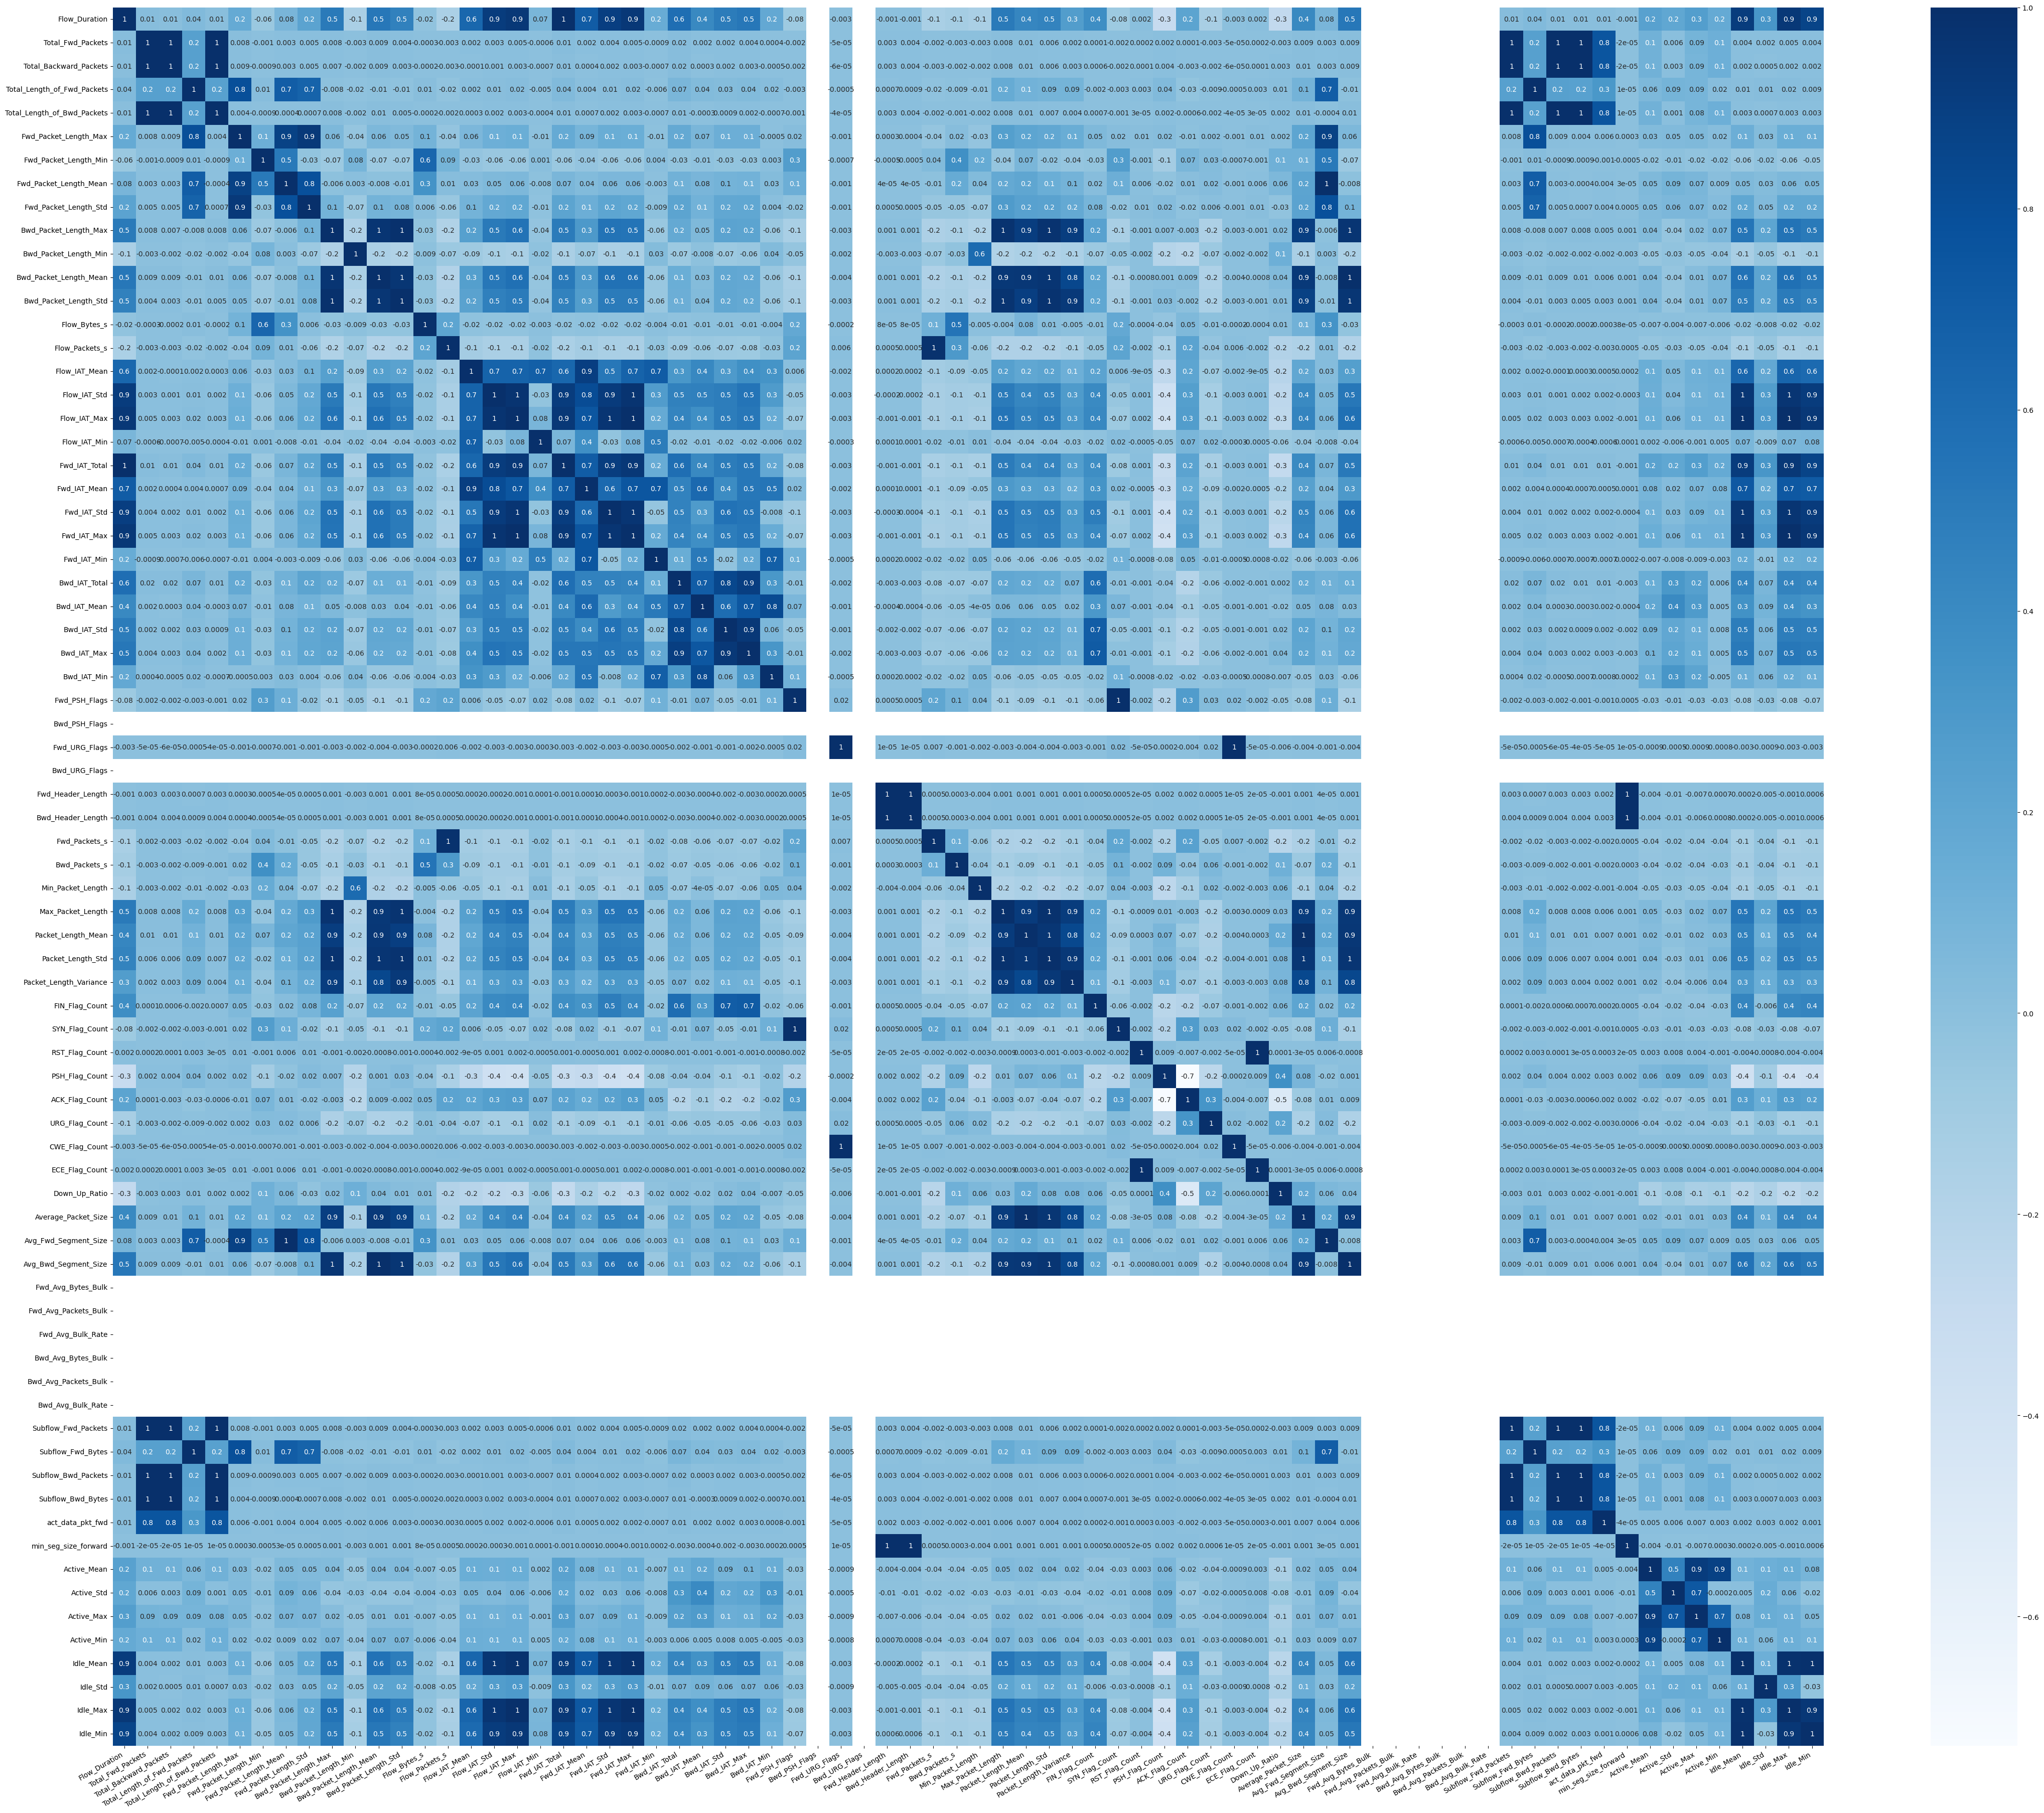

In [25]:
# Строим матрицу корреляции для всех признаков 
import seaborn as sns
corr_matrix = x_train.corr()
plt.rcParams['figure.figsize'] = (55, 45)
g = sns.heatmap(corr_matrix, annot=True, fmt='.1g', cmap='Blues')
g.set_xticklabels(g.get_xticklabels(), verticalalignment='top', horizontalalignment='right', rotation=30);
#plt.savefig('corr_heatmap.png', dpi=300, bbox_inches='tight')

In [26]:
#создаем функцию и удаляем наиболее коррелирующие признаки
def remove_correlated_features(input_df, threshold=0.9):
    #вычисляем матрицу коррелции
    corr_matrix = input_df.corr().abs()
    
    #верхний треугольник матрицы корреляции
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    #поиск столбцов с корреляцией = выше заданного порога
    to_drop = [column for column in upper.columns if any(upper[column]>= threshold)]
    
    return input_df.drop(columns=to_drop), to_drop 

#удаление для тренировочной выборки

x_train_clean_corr_df, dropped_corr_features=remove_correlated_features(x_train, threshold=0.9)
print(f'Удалено признаков: {len(dropped_corr_features)}')
print(f'Удаленные признаки: {dropped_corr_features}')

# удаляем точно такие же признаки из тестового набора
#  для согласованности данных и снижения риска утечки
x_test_clean_corr_df = x_test.drop(columns=dropped_corr_features, errors='ignore')

Удалено признаков: 33
Удаленные признаки: ['Total_Backward_Packets', 'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Std', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Bwd_IAT_Max', 'Bwd_Header_Length', 'Fwd_Packets_s', 'Max_Packet_Length', 'Packet_Length_Mean', 'Packet_Length_Std', 'Packet_Length_Variance', 'SYN_Flag_Count', 'CWE_Flag_Count', 'ECE_Flag_Count', 'Average_Packet_Size', 'Avg_Fwd_Segment_Size', 'Avg_Bwd_Segment_Size', 'Subflow_Fwd_Packets', 'Subflow_Fwd_Bytes', 'Subflow_Bwd_Packets', 'Subflow_Bwd_Bytes', 'min_seg_size_forward', 'Active_Max', 'Idle_Mean', 'Idle_Max', 'Idle_Min']


In [27]:
#Проверяем на наличие коррелирующих данных после процесса удаления 
corr_matrix_cleaned = x_train_clean_corr_df.corr().abs()
# Проверяем, есть ли ещё сильные корреляции
upper_cleaned = corr_matrix_cleaned.where(np.triu(np.ones(corr_matrix_cleaned.shape), k=1).astype(bool))
still_high_corr = upper_cleaned[upper_cleaned > 0.9].dropna(how='all', axis=1).dropna(how='all', axis=0)
print("Оставшиеся сильно коррелирующие пары:")
print(still_high_corr)

Оставшиеся сильно коррелирующие пары:
Empty DataFrame
Columns: []
Index: []


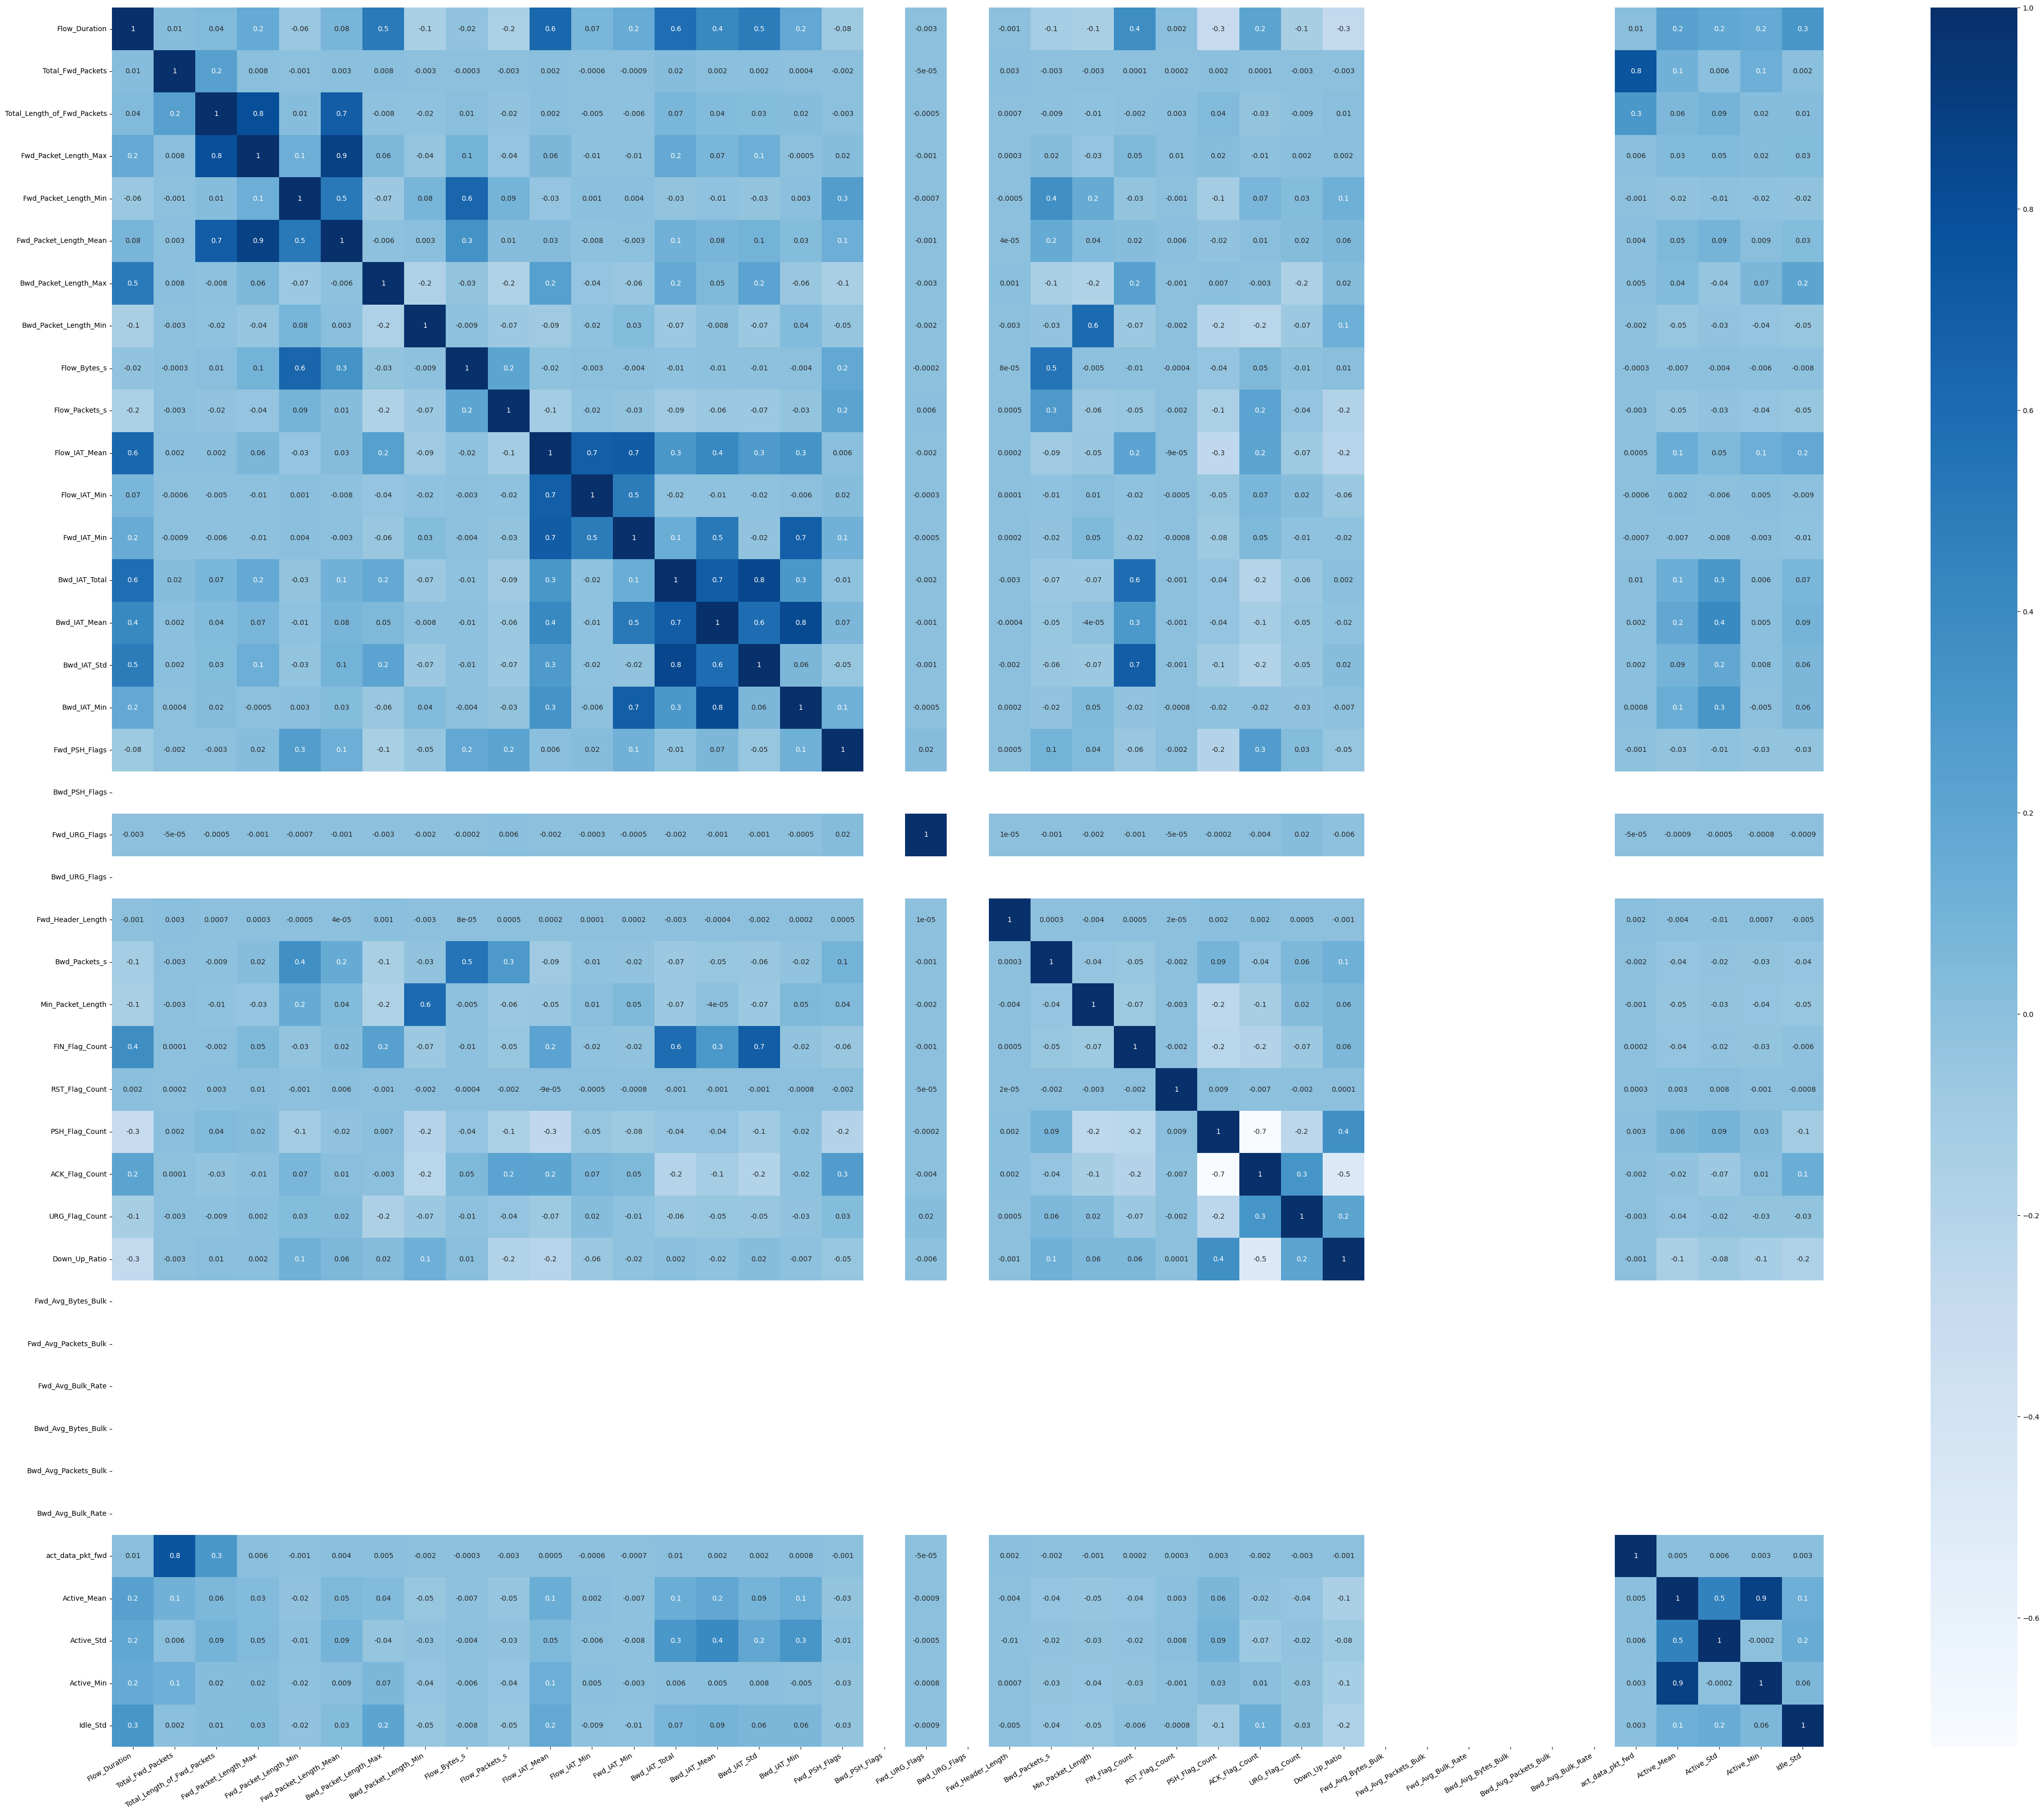

In [28]:
#Отображаем матрицу корреляции после удаления наиболее коррелирующих признаков
import seaborn as sns
corr_matrix = x_train_clean_corr_df.corr()
plt.rcParams['figure.figsize'] = (55, 45)
g = sns.heatmap(corr_matrix, annot=True, fmt='.1g', cmap='Blues')
g.set_xticklabels(g.get_xticklabels(), verticalalignment='top', horizontalalignment='right', rotation=30);
#plt.savefig('corr_heatmap.png', dpi=300, bbox_inches='tight')

### Шаг 2 - сохранение итоговых предобработанных данных (конец Препроцессинга)

In [30]:
#Сохранение сбалансированной тренировочной выборки в файл
x_train_clean_corr_df['Label'] = y_train.copy()
x_train_clean_corr_df.to_csv('Preprocessed_train_data_selection.csv', index=False)
print("Файл тренировочной выборки успешно сохранен")
print(f"shape: {x_train_clean_corr_df.shape}")

#сохранение тестовой чистой выборки в файл
x_test_clean_corr_df['Label'] = y_test.copy()
x_test_clean_corr_df.to_csv('Preprocessed_test_data_selection.csv', index=False)
print("Файл тестовой выборки, успешно сохранен")
print(f"shape: {x_test_clean_corr_df.shape}")

print("\nЭтапы препроцессинга файлов успешно завершены!")

Файл тренировочной выборки успешно сохранен
shape: (459617, 42)
Файл тестовой выборки, успешно сохранен
shape: (689303, 42)

Этапы препроцессинга файлов успешно завершены!
